In [1]:
import torch 

In [29]:
s_dict = torch.load('/Users/eustachelebihan/Downloads/medsam_vit_b.pth', map_location=torch.device('cpu'))
torch.save(s_dict, "/Users/eustachelebihan/Downloads/medsam_vit_b_cpu.pth")

In [38]:
from model import RadSam
from segment_anything import sam_model_registry


sam_checkpoint1 = "/Users/eustachelebihan/Downloads/medsam_vit_b_cpu.pth"
sam_checkpoint2 = "/Users/eustachelebihan/Downloads/sam_vit_b_01ec64.pth"

model_type = "vit_b"

model1 = sam_model_registry[model_type](checkpoint=sam_checkpoint1)
model2 = sam_model_registry[model_type](checkpoint=sam_checkpoint2)

radsam_model = RadSam(
    model1.image_encoder,
    model1.mask_decoder,
    model1.prompt_encoder
)

In [36]:
from utils_cus import infer
import cv2

img_path = "/Users/eustachelebihan/Development/radium-challenge/data/x-val/0.png"
image = cv2.imread(img_path)
# mask = infer(image, radsam_model, 'cpu')

In [45]:

from segment_anything import sam_model_registry, SamAutomaticMaskGenerator

model_type = "vit_b"
model = sam_model_registry[model_type]()

model.image_encoder = radsam_model.image_encoder
model.mask_decoder = radsam_model.mask_decoder
model.prompt_encoder = radsam_model.prompt_encoder

mask_generator = SamAutomaticMaskGenerator(model, pred_iou_thresh=0.2)
masks = mask_generator.generate(image)

In [47]:
import numpy as np

print(np.unique(masks))

[]


In [50]:
masks

[]

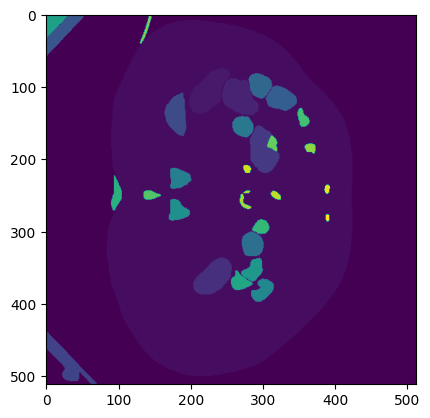

In [49]:
import matplotlib.pyplot as plt 

plt.imshow(mask)

In [55]:
import yaml 
from easydict import EasyDict
from datetime import datetime
import os

with open('config.yaml', 'r') as file:
        config_dict = yaml.safe_load(file)

config = EasyDict(config_dict)
run_id = datetime.now().strftime("%Y%m%d-%H%M")
device = config.training.device
model_save_path = os.path.join(config.model.work_dir, config.model.task_name + "-" + run_id)
os.makedirs(model_save_path, exist_ok=True)

In [62]:
a = dict(config)
a['wandb']